# STOCK MARKET ANALYSIS

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


IMPORTING THE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')
%matplotlib inline


In [3]:
# fro reading stock data from yahoo

In [4]:
from pandas_datareader.data import DataReader
import yfinance as yf


In [5]:
# for time stamps

In [6]:
from datetime import datetime

In [7]:
# set up start and end times for data

In [8]:
tech_list = ['AMZN','TSLA','GM','F']
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

for stock in tech_list:
    globals()[stock]=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
# first let us do for amazon data and let us combine all together

In [10]:
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-18,178.317505,185.210007,178.050003,184.802994,184.802994,114070000
2021-11-19,185.634506,188.107498,183.785995,183.828506,183.828506,98734000
2021-11-22,183.819000,185.673004,178.375000,178.628494,178.628494,96844000
2021-11-23,179.251999,181.052505,176.385498,179.001999,179.001999,73804000
2021-11-24,178.133499,180.682007,176.842499,179.020493,179.020493,46560000


In [11]:
# amazon stock price over time

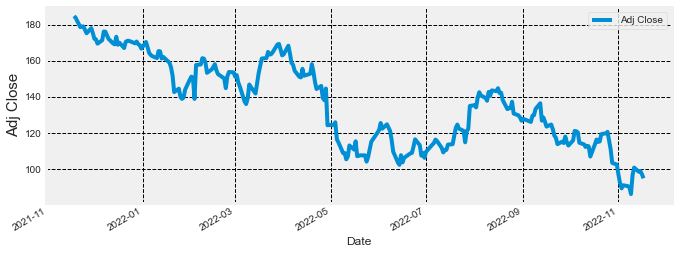

In [12]:
AMZN['Adj Close'].plot(legend=True,figsize=(10,4))
plt.grid(color='black',linestyle='--',linewidth=1)
plt.ylabel('Adj Close',fontsize=15)
plt.show()

In [13]:
# Volume traded by amazon over time

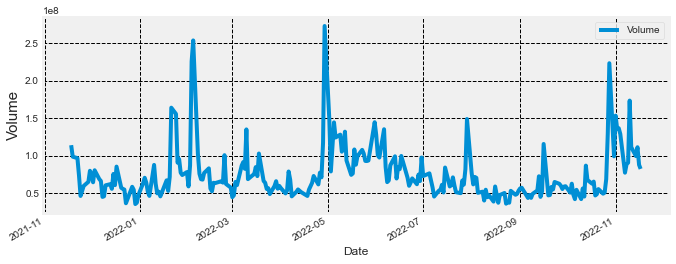

In [14]:
AMZN['Volume'].plot(legend=True,figsize=(10,4))
plt.grid(color='black',linestyle='--',linewidth=1)
plt.ylabel('Volume',fontsize=15)
plt.show()

In [15]:
# combining the tech_list data

In [17]:
company_list = [AMZN,TSLA,GM,F]
company_name = ['AMAZON','TESLA','GM','FORD']
for company,com_name in zip(company_list,company_name):
    company['company_name']=com_name
    
    
df = pd.concat(company_list,axis=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-11-18,178.317505,185.210007,178.050003,184.802994,184.802994,114070000,AMAZON
2021-11-19,185.634506,188.107498,183.785995,183.828506,183.828506,98734000,AMAZON
2021-11-22,183.819000,185.673004,178.375000,178.628494,178.628494,96844000,AMAZON
2021-11-23,179.251999,181.052505,176.385498,179.001999,179.001999,73804000,AMAZON
2021-11-24,178.133499,180.682007,176.842499,179.020493,179.020493,46560000,AMAZON


In [18]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-11-11,14.26,14.67,14.20,14.50,14.35,60141900,FORD
2022-11-14,14.23,14.35,14.06,14.06,14.06,57691600,FORD
2022-11-15,14.29,14.58,14.20,14.30,14.30,61835700,FORD
2022-11-16,14.10,14.17,13.84,13.90,13.90,47484200,FORD
2022-11-17,13.66,13.91,13.55,13.91,13.91,54285100,FORD


CLEANING THE DATA

In [19]:
df.shape

(1008, 7)

In [20]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name'], dtype='object')

In [21]:
# finding missing values

In [22]:
df.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [23]:
# there is no missing values

In [22]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-18 to 2022-11-17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


In [23]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,136.140496,138.342359,133.649010,135.899963,135.899963,7.505058e+07
std,24.261844,24.142611,24.196346,24.142848,24.142848,3.413132e+07
min,89.470001,89.480003,85.870003,86.139999,86.139999,3.575400e+07
25%,114.544998,116.917500,113.057499,114.807499,114.807499,5.380218e+07
50%,135.489998,137.739998,133.786247,135.702248,135.702248,6.502665e+07
75%,157.010376,159.062500,154.502876,157.339123,157.339123,8.525302e+07
max,185.634506,188.107498,183.785995,184.802994,184.802994,2.726620e+08


In [24]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,286.063095,292.965040,277.840026,285.104630,285.104630,8.052045e+07
std,50.371830,50.876276,49.061344,49.939967,49.939967,2.165109e+07
min,183.960007,186.160004,177.119995,177.589996,177.589996,3.504270e+07
25%,243.003334,249.968334,235.100006,240.744164,240.744164,6.464342e+07
50%,290.501663,296.313339,280.868347,288.360001,288.360001,7.857645e+07
75%,318.774162,331.900002,307.816658,318.030838,318.030838,9.351338e+07
max,396.516663,402.666656,378.679993,399.926666,399.926666,1.515657e+08


In [25]:
GM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,42.846944,43.608532,42.053809,42.802659,42.724330,1.710075e+07
std,9.256173,9.361525,9.054279,9.160570,9.128487,5.912237e+06
min,30.850000,31.650000,30.330000,30.870001,30.799683,7.004100e+06
25%,36.285000,36.974999,35.590000,36.127501,36.045204,1.317072e+07
50%,39.375000,40.144999,38.760000,39.490000,39.400045,1.613990e+07
75%,48.772501,49.194999,47.665001,48.450001,48.339635,1.982938e+07
max,65.519997,67.209999,62.599998,65.739998,65.590248,4.469130e+07


In [26]:
F.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,15.716230,16.019405,15.404444,15.712540,15.364937,7.703742e+07
std,3.363493,3.448196,3.267731,3.354607,3.180582,3.543599e+07
min,11.050000,11.210000,10.610000,11.060000,10.837501,3.046800e+07
25%,12.970000,13.217500,12.717500,12.962500,12.728172,5.490860e+07
50%,15.210000,15.505000,15.075000,15.290000,14.997687,6.615770e+07
75%,17.617500,17.985001,17.329999,17.727499,17.256053,8.803625e+07
max,24.870001,25.870001,24.370001,25.190001,24.394674,3.116452e+08


In [28]:
# let us visualize the closing price

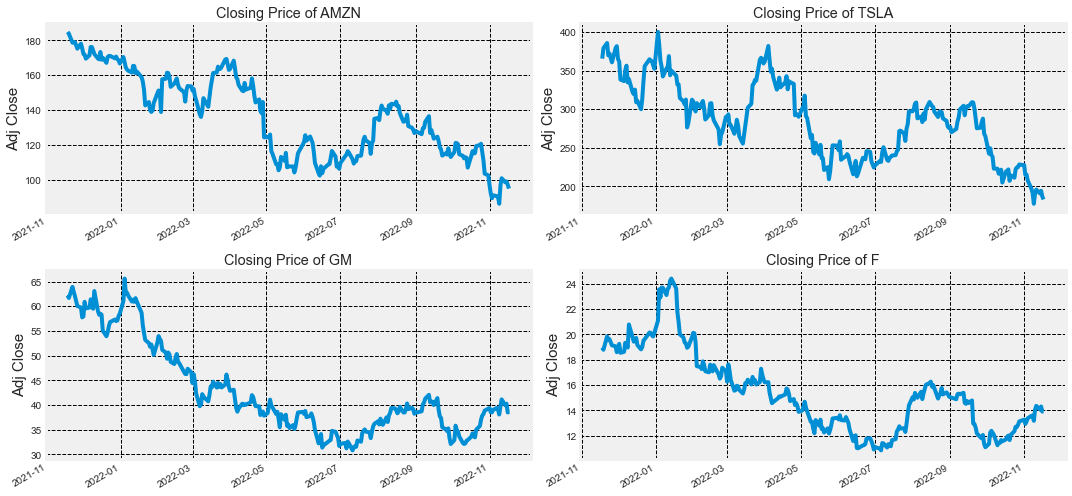

In [29]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close',fontsize=15)
    plt.xlabel(None,fontsize=15)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    plt.grid(color='black',linestyle='--',linewidth=1)
    
plt.tight_layout()

In [31]:
# change in a stock’s volume being traded, over time

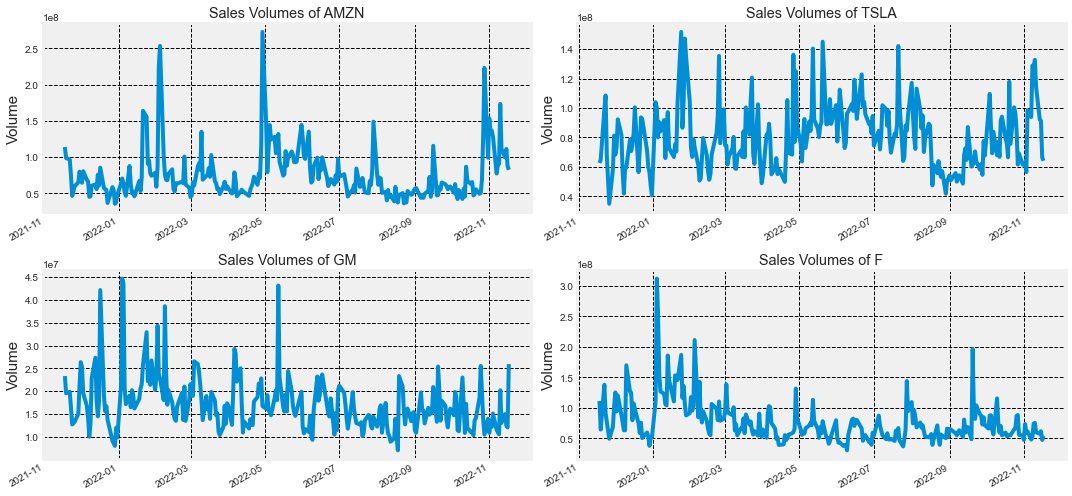

In [30]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume',fontsize=15)
    plt.xlabel(None,fontsize=15)
    plt.title(f"Sales Volumes of {tech_list[i - 1]}")
    plt.grid(color='black',linestyle='--',linewidth=1)
    
plt.tight_layout()

In [31]:
# from this we can see the volumne traded

MOVING AVERAGE OF STOCKS

In [33]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

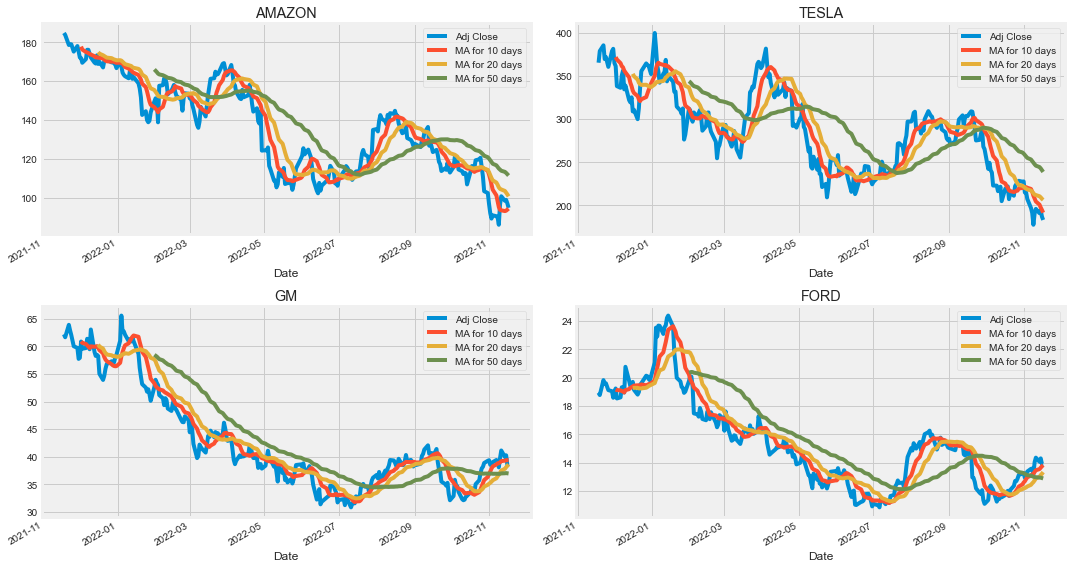

In [34]:
fig, axes=plt.subplots(nrows=2,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('AMAZON')

TSLA[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('TESLA')

GM[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('GM')

F[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('FORD')

fig.tight_layout()

DAILY RETURN STOCK ON AVERAGE

In [35]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()


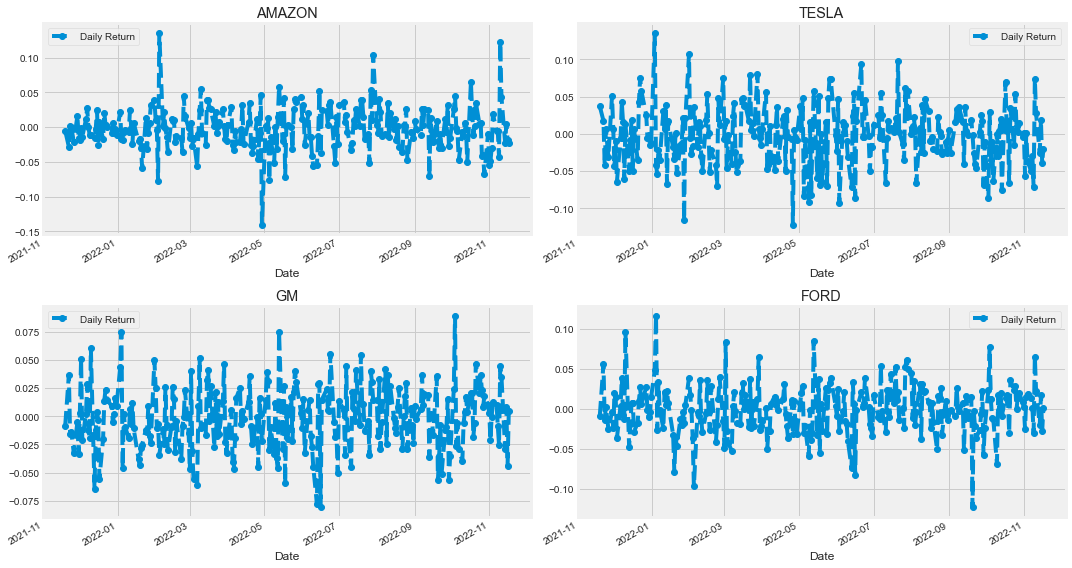

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AMZN['Daily Return'].plot(ax=axes[0,0],legend=True,linestyle='--',marker='o')
axes[0,0].set_title('AMAZON')

TSLA['Daily Return'].plot(ax=axes[0,1],legend=True,linestyle='--',marker='o')
axes[0,1].set_title('TESLA')

GM['Daily Return'].plot(ax=axes[1,0],legend=True,linestyle='--',marker='o')
axes[1,0].set_title('GM')

F['Daily Return'].plot(ax=axes[1,1],legend=True,linestyle='--',marker='o')
axes[1,1].set_title('FORD')

fig.tight_layout()

In [37]:
# LET US PLOT DAILY RETURN USING HISTOGRAM

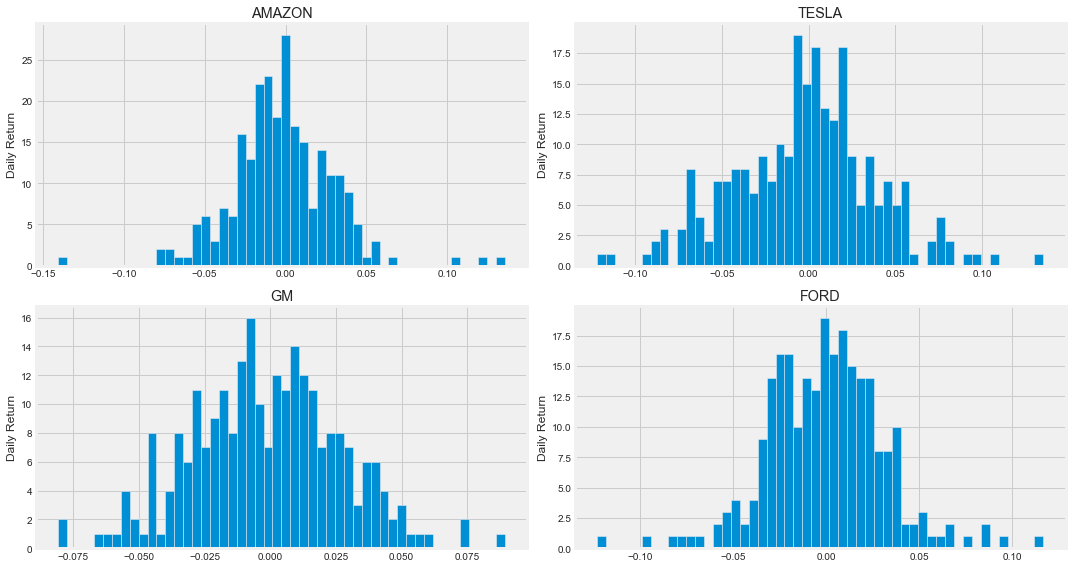

In [38]:
plt.figure(figsize=(15, 8))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [40]:
# correlation between different stocks closing prices

In [41]:
#  Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']


In [42]:
closing_df.head()

Symbols,AMZN,TSLA,GM,F
Date,,,,
2021-11-17,177.449997,363.003326,64.462822,19.232958
2021-11-18,184.802994,365.459991,62.188019,18.942429
2021-11-19,183.828506,379.019989,61.659225,18.777796
2021-11-22,178.628494,385.623322,63.914074,19.833382
2021-11-23,179.001999,369.676666,62.906376,19.562225


In [43]:
# Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks

In [44]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AMZN,TSLA,GM,F
Date,,,,
2021-11-17,NaN,NaN,NaN,NaN
2021-11-18,0.041437,0.006768,-0.035289,-0.015106
2021-11-19,-0.005273,0.037104,-0.008503,-0.008691
2021-11-22,-0.028287,0.017422,0.036570,0.056215
2021-11-23,0.002091,-0.041353,-0.015766,-0.013672


In [45]:
# now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

<Figure size 1080x504 with 0 Axes>

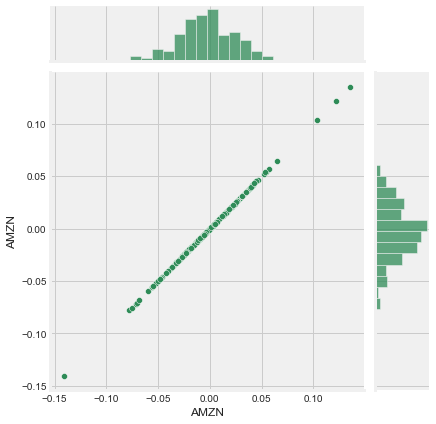

In [46]:
plt.figure(figsize=(15,7))
sns.jointplot(x='AMZN', y='AMZN', data=tech_rets, kind='scatter', color='seagreen')
plt.show()

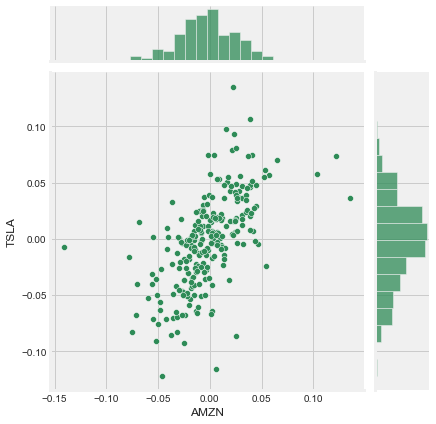

In [48]:
sns.jointplot(x='AMZN', y='TSLA', data=tech_rets, kind='scatter', color='seagreen')
plt.show()

<Figure size 1080x504 with 0 Axes>

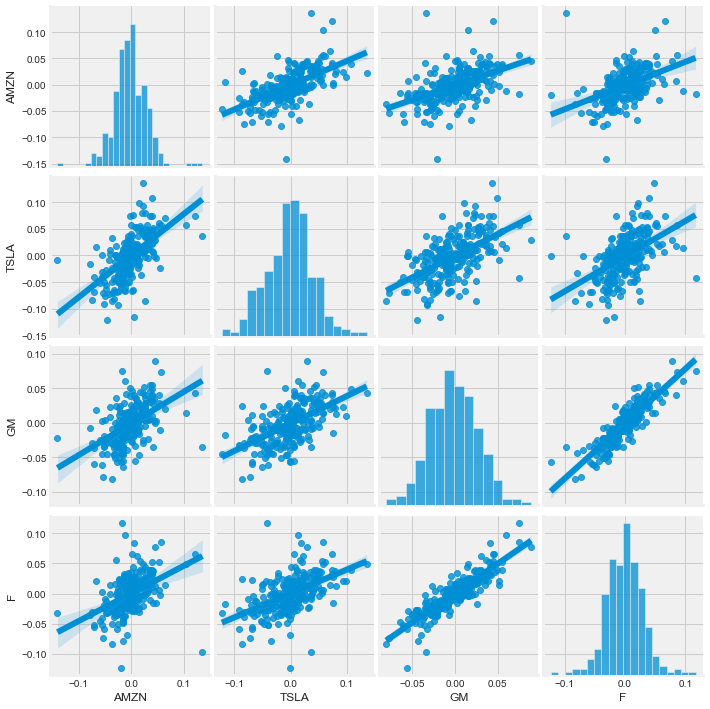

In [49]:
plt.figure(figsize=(15,7))
sns.pairplot(tech_rets,kind='reg')
plt.show()

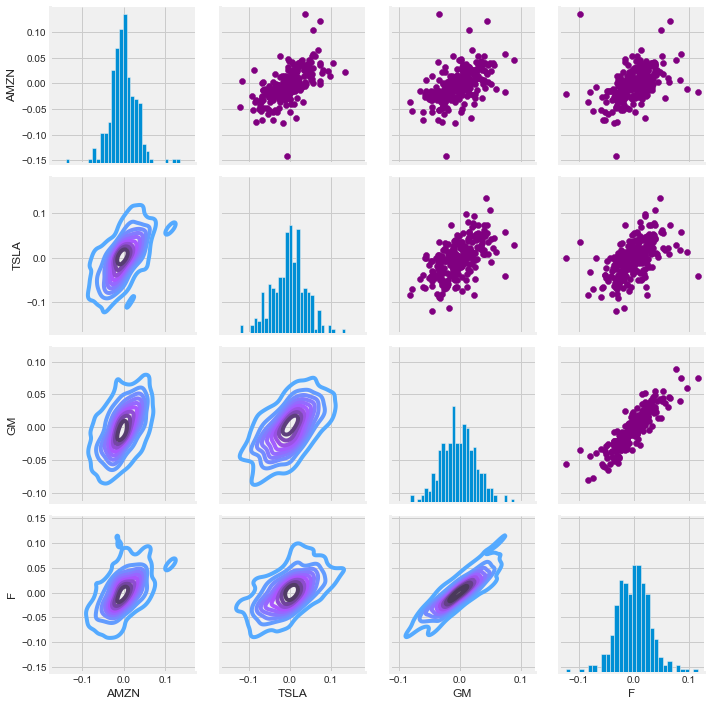

In [50]:
#  Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

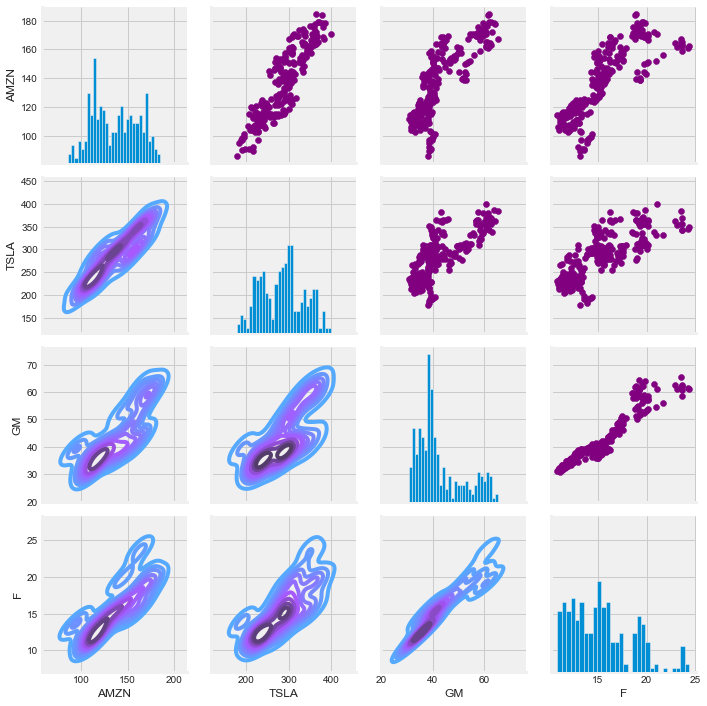

In [51]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

In [52]:
# Let's go ahead and use sebron heatmap for a quick correlation plot for the daily returns

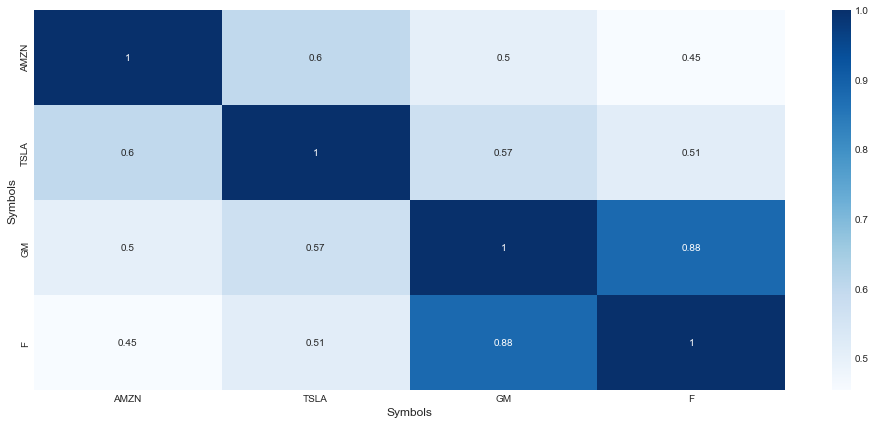

In [53]:
plt.figure(figsize=(15,7))
sns.heatmap(tech_rets.corr(),annot=True,cmap='Blues')
plt.show()
           

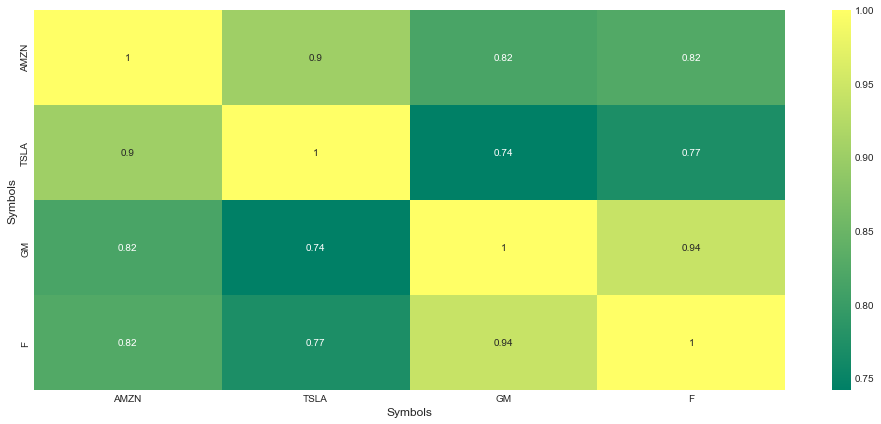

In [54]:
plt.figure(figsize=(15,7))
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.show()

In [55]:
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2021-11-18,178.317505,185.210007,178.050003,184.802994,184.802994,114070000,AMAZON,NaN,NaN,NaN,NaN
2021-11-19,185.634506,188.107498,183.785995,183.828506,183.828506,98734000,AMAZON,NaN,NaN,NaN,-0.005273
2021-11-22,183.819000,185.673004,178.375000,178.628494,178.628494,96844000,AMAZON,NaN,NaN,NaN,-0.028287
2021-11-23,179.251999,181.052505,176.385498,179.001999,179.001999,73804000,AMAZON,NaN,NaN,NaN,0.002091
2021-11-24,178.133499,180.682007,176.842499,179.020493,179.020493,46560000,AMAZON,NaN,NaN,NaN,0.000103


In [58]:
TSLA.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2021-11-18,368.850006,370.666656,358.339996,365.459991,365.459991,62696700,TESLA,NaN,NaN,NaN,NaN
2021-11-19,366.290009,379.573334,364.233337,379.019989,379.019989,64926900,TESLA,NaN,NaN,NaN,0.037104
2021-11-22,387.443329,400.649994,377.476654,385.623322,385.623322,99217500,TESLA,NaN,NaN,NaN,0.017422
2021-11-23,389.170013,393.500000,354.233337,369.676666,369.676666,108515100,TESLA,NaN,NaN,NaN,-0.041353
2021-11-24,360.130005,377.589996,354.000000,372.000000,372.000000,67680600,TESLA,NaN,NaN,NaN,0.006285


In [59]:
GM.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2021-11-18,64.330002,65.180000,62.090000,62.330002,62.188019,23308100,GM,NaN,NaN,NaN,NaN
2021-11-19,62.480000,62.970001,61.560001,61.799999,61.659225,19520600,GM,NaN,NaN,NaN,-0.008503
2021-11-22,61.950001,64.959999,61.759998,64.059998,63.914074,19836200,GM,NaN,NaN,NaN,0.036570
2021-11-23,63.730000,64.040001,62.259998,63.049999,62.906376,16225100,GM,NaN,NaN,NaN,-0.015766
2021-11-24,62.299999,62.599998,61.630001,62.189999,62.048336,12685000,GM,NaN,NaN,NaN,-0.013640


In [60]:
F.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2021-11-18,20.160000,20.260000,19.360001,19.559999,18.942429,111368800,FORD,NaN,NaN,NaN,NaN
2021-11-19,19.639999,19.670000,19.240000,19.389999,18.777796,64610400,FORD,NaN,NaN,NaN,-0.008691
2021-11-22,19.389999,20.790001,19.309999,20.480000,19.833384,137861700,FORD,NaN,NaN,NaN,0.056215
2021-11-23,20.430000,20.530001,19.969999,20.200001,19.562225,90984500,FORD,NaN,NaN,NaN,-0.013672
2021-11-24,19.969999,20.340000,19.780001,20.250000,19.610645,77324300,FORD,NaN,NaN,NaN,0.002475


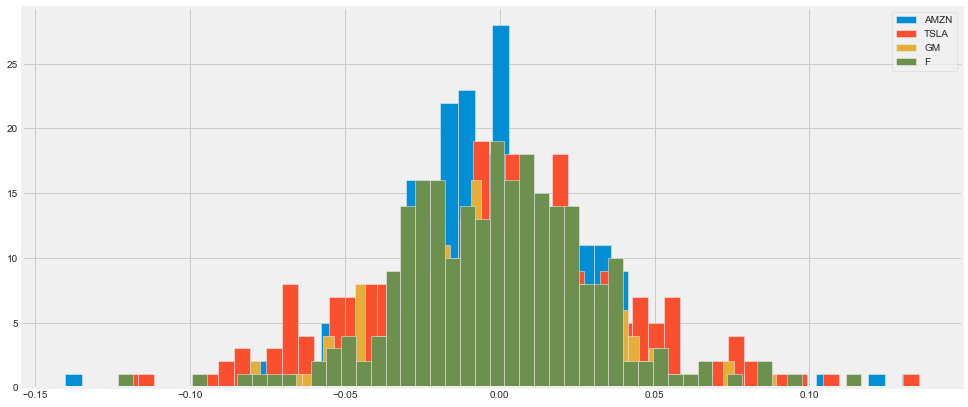

In [61]:
AMZN['Daily Return'].hist(bins=50,label='AMZN',figsize=(15,7))
TSLA['Daily Return'].hist(bins=50,label='TSLA')
GM['Daily Return'].hist(bins=50,label='GM')
F['Daily Return'].hist(bins=50,label='F')
plt.legend()
plt.show()

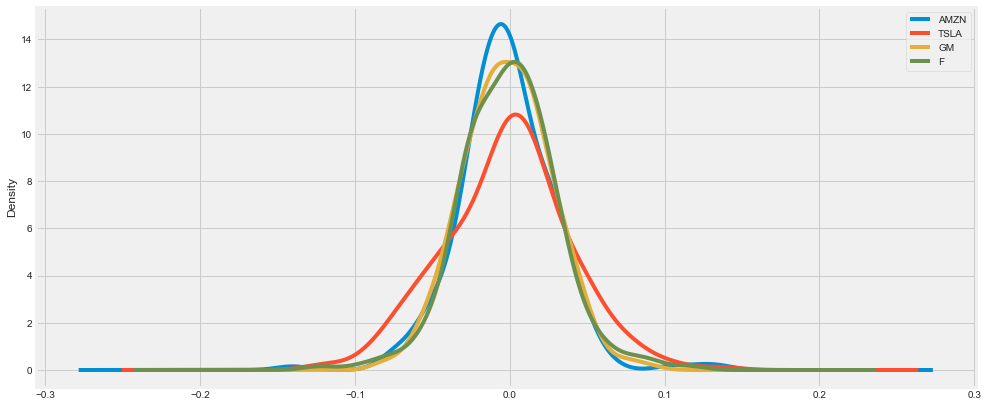

In [62]:
AMZN['Daily Return'].plot(kind='kde',label='AMZN',figsize=(15,7))
TSLA['Daily Return'].plot(kind='kde',label='TSLA')
GM['Daily Return'].plot(kind='kde',label='GM')
F['Daily Return'].plot(kind='kde',label='F')
plt.legend()
plt.show()

In [61]:
# cumulative return

In [63]:
AMZN['cumulative return'] = (1+AMZN['Daily Return']).cumprod()
TSLA['cumulative return'] = (1+TSLA['Daily Return']).cumprod()
GM['cumulative return'] = (1+GM['Daily Return']).cumprod()
F['cumulative return'] = (1+F['Daily Return']).cumprod()


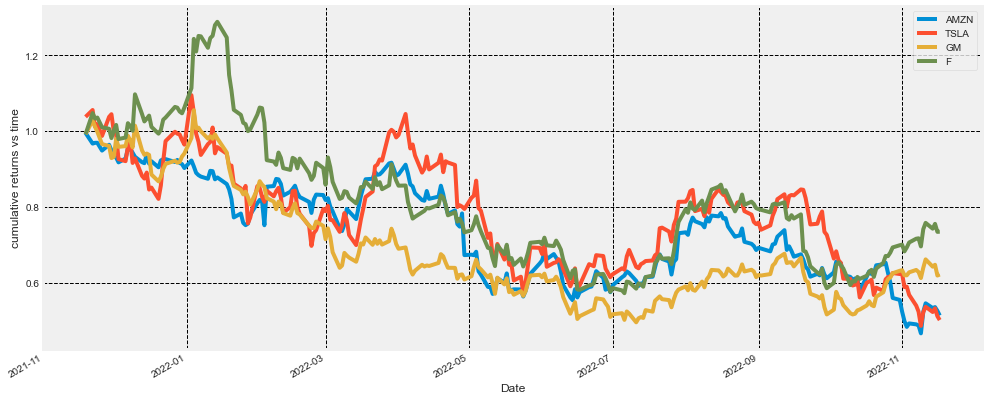

In [66]:
AMZN['cumulative return'].plot(label='AMZN',figsize=(15,7))
TSLA['cumulative return'].plot(label='TSLA')
GM['cumulative return'].plot(label='GM')
F['cumulative return'].plot(label='F')
plt.ylabel('cumulative returns vs time')
plt.legend()
plt.grid(color='black',linestyle='--',linewidth=1)
plt.show()


In [67]:
# COMPARING THESE 4 COMPANY THE CUMULATIVE RETURN IS MORE FOR FORD AND LOW FOR AMAZON
# AMAZON HAS LOSE 1 TRILLION DOLLAR IN VALUE LAST WEEK